In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
bicing_status_cols = ['last_updated', 'station_id', 'num_bikes_available', 'num_docks_available']
bicing_status_2212 = pd.read_csv(r'..\data\raw\bicing_stations_status\2022\2022_12_Desembre_BicingNou_ESTACIONS.csv', usecols=bicing_status_cols)

In [3]:
bicing_status_2212.sample(20)

,station_id,num_bikes_available,num_docks_available,last_updated
2514830,91,21,14,1671343479
632040,157,21,12,1670224802
2474575,243,6,21,1671319479
2014833,43,9,17,1671046490
672873,158,10,17,1670249103
2504011,389,19,8,1671336909
4972,440,18,9,1669851893
2720,206,15,18,1669850697
1452554,300,5,13,1670712293
2567093,382,8,18,1671374380


In [4]:
bicing_status_2212.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512523 entries, 0 to 4512522
Data columns (total 4 columns):
 #   Column               Dtype
---  ------               -----
 0   station_id           int64
 1   num_bikes_available  int64
 2   num_docks_available  int64
 3   last_updated         int64
dtypes: int64(4)
memory usage: 137.7 MB


In [5]:
bicing_status_2212.shape

(4512523, 4)

In [6]:
bicing_status_2212.describe().T

,count,mean,std,min,25%,50%,75%,max
station_id,4512523.0,2.615072e+02,149.427218,1.000000e+00,1.320000e+02,2.630000e+02,3.900000e+02,5.190000e+02
num_bikes_available,4512523.0,1.072229e+01,7.664918,0.000000e+00,5.000000e+00,1.000000e+01,1.600000e+01,5.400000e+01
num_docks_available,4512523.0,1.566360e+01,7.858505,0.000000e+00,1.000000e+01,1.600000e+01,2.100000e+01,5.400000e+01
last_updated,4512523.0,1.671189e+09,773538.357338,1.669849e+09,1.670520e+09,1.671190e+09,1.671859e+09,1.672528e+09


In [7]:
bicing_status_2212.memory_usage(deep=True).sum()

144400864

In [8]:
bicing_status_2212.isna().sum()

station_id             0
num_bikes_available    0
num_docks_available    0
last_updated           0
dtype: int64

In [9]:
def clean_bicing_status(df):
    """Cleans the bicing status DataFrame including converting data types, and removing unnecessary columns.

    Args:
        df (DataFrame):

    Returns:
        DataFrame:
    """
 
    weekend = {1: False, 2: False, 3: False, 4: False, 5: False, 6: True, 7: True}
    
    def int64_to_uint16(df_):
        cols = df_.select_dtypes('int64')
        return (df_
                .astype({col:'uint16' for col in cols}))
    return (df
            .query('num_bikes_available != 0 and num_docks_available != 0')
            .assign(last_updated=pd.to_datetime(df['last_updated'], unit='s'), 
                    year=lambda df_: df_['last_updated'].dt.year.astype('uint16'),
                    month=lambda df_: df_['last_updated'].dt.month.astype('uint8'),
                    day=lambda df_: df_['last_updated'].dt.day.astype('uint8'),
                    weekday=lambda df_: df_['last_updated'].dt.isocalendar().day.astype('uint8'),
                    hour=lambda df_: df_['last_updated'].dt.hour.astype('uint8'),
                    weekend=lambda df_: df_['weekday'].map(weekend),
                    )
            .pipe(int64_to_uint16)
            .drop(columns='last_updated')
    )

In [10]:
clean_bicing_status(bicing_status_2212).head(25)

,station_id,num_bikes_available,num_docks_available,year,month,day,weekday,hour,weekend
0,1,29,15,2022,11,30,3,22,False
1,2,18,10,2022,11,30,3,22,False
2,3,11,16,2022,11,30,3,22,False
3,4,13,8,2022,11,30,3,22,False
4,5,13,26,2022,11,30,3,22,False
5,6,15,24,2022,11,30,3,22,False
6,7,20,6,2022,11,30,3,22,False
7,8,11,14,2022,11,30,3,22,False
8,9,26,1,2022,11,30,3,22,False
9,10,24,18,2022,11,30,3,22,False


In [11]:
clean_bicing_status(bicing_status_2212).info()

<class 'pandas.core.frame.DataFrame'>
Index: 4258134 entries, 0 to 4512522
Data columns (total 9 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   station_id           uint16
 1   num_bikes_available  uint16
 2   num_docks_available  uint16
 3   year                 uint16
 4   month                uint8 
 5   day                  uint8 
 6   weekday              uint8 
 7   hour                 uint8 
 8   weekend              bool  
dtypes: bool(1), uint16(4), uint8(4)
memory usage: 85.3 MB


In [12]:
def load_table(year, month, month_name):
    """Loads the bicing stations data from a CSV file.

    Args:
        year (int): The year of the data.
        month (int): The month of the data.
        month_name (str): The name of the month in Catalan.

    Returns:
        DataFrame: A Pandas DataFrame containing the bicing stations data with columns:
            - last_updated: Timestamp of the last update
            - station_id: ID of the station
            - num_bikes_available: Number of available bikes at the station
            - num_docks_available: Number of available docks at the station
    """
    bicing_status_cols = ['last_updated', 'station_id', 'num_bikes_available', 'num_docks_available']
    file_path = fr'..\data\raw\bicing_stations_status\{year}\{year}_{month:02d}_{month_name}_BicingNou_ESTACIONS.csv'
    try:
        return clean_bicing_status(pd.read_csv(file_path, usecols=bicing_status_cols))
    except FileNotFoundError:
        return None
        

In [13]:
i2m = list(zip(range(1, 13), ['Gener', 'Febrer', 'Març', 'Abril', 'Maig', 'Juny', 'Juliol', 'Agost', 'Setembre', 'Octubre', 'Novembre', 'Desembre']))

bicing_status = pd.concat([load_table(year, month, month_name) for year in tqdm([2019, 2020, 2021, 2022]) for month, month_name in tqdm(i2m) if load_table(year, month, month_name) is not None])

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

In [14]:
bicing_status.head(25)

,station_id,num_bikes_available,num_docks_available,year,month,day,weekday,hour,weekend
2,3,12,13,2019,6,30,7,22,True
3,4,1,18,2019,6,30,7,22,True
4,5,22,15,2019,6,30,7,22,True
5,6,13,23,2019,6,30,7,22,True
6,7,13,11,2019,6,30,7,22,True
7,8,18,8,2019,6,30,7,22,True
8,9,12,10,2019,6,30,7,22,True
9,11,6,13,2019,6,30,7,22,True
10,12,8,16,2019,6,30,7,22,True
11,13,1,49,2019,6,30,7,22,True


In [15]:
bicing_status.shape

(146549622, 9)

In [16]:
bicing_status.isna().sum()

station_id             0
num_bikes_available    0
num_docks_available    0
year                   0
month                  0
day                    0
weekday                0
hour                   0
weekend                0
dtype: int64

In [17]:
bicing_status.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146549622 entries, 2 to 4512522
Data columns (total 9 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   station_id           uint16
 1   num_bikes_available  uint16
 2   num_docks_available  uint16
 3   year                 uint16
 4   month                uint8 
 5   day                  uint8 
 6   weekday              uint8 
 7   hour                 uint8 
 8   weekend              bool  
dtypes: bool(1), uint16(4), uint8(4)
memory usage: 2.9 GB


In [18]:
def tweak_bicing_status(df):
    """Performs additional tweaks on the data after the cleaning including aggregating data, sorting, and calculating the percentage of docks available and other required features.

    Args:
        df (DataFrame):
        
    Returns:
        DataFrame:
    """
    def float64_to_float32(df_):
        cols = df_.select_dtypes('float64')
        return (df_
                .astype({col:'float32' for col in cols}))
    return (df
            .groupby(by=['station_id', 'year', 'month', 'day', 'weekday', 'hour', 'weekend'], as_index=False).agg({'num_bikes_available': 'median', 'num_docks_available': 'median'})
            .sort_values(by=['station_id', 'year', 'month', 'day', 'hour'])
            .assign(percentage_docks_available=lambda df_: df_['num_docks_available']/(df_['num_docks_available'] + df_['num_bikes_available']),
                    ctx_1=lambda df_: df_['percentage_docks_available'].shift(1),
                    ctx_2=lambda df_: df_['percentage_docks_available'].shift(2),
                    ctx_3=lambda df_: df_['percentage_docks_available'].shift(3),
                    ctx_4=lambda df_: df_['percentage_docks_available'].shift(4),
                )
            .pipe(float64_to_float32)
            .dropna()
            .loc[:, ['station_id', 'year', 'month', 'day', 'weekday', 'weekend', 'hour', 'num_bikes_available', 'num_docks_available', 'ctx_1', 'ctx_2', 'ctx_3', 'ctx_4', 'percentage_docks_available']]
    )

In [19]:
bicing_status = tweak_bicing_status(bicing_status)

In [20]:
bicing_status.head(25)

,station_id,year,month,day,weekday,weekend,hour,num_bikes_available,num_docks_available,ctx_1,ctx_2,ctx_3,ctx_4,percentage_docks_available
4,1,2019,7,1,1,False,4,25.0,1.0,0.038462,0.038462,0.038462,0.038462,0.038462
5,1,2019,7,1,1,False,5,21.5,4.5,0.038462,0.038462,0.038462,0.038462,0.173077
6,1,2019,7,1,1,False,6,16.0,10.0,0.173077,0.038462,0.038462,0.038462,0.384615
7,1,2019,7,1,1,False,7,9.5,16.5,0.384615,0.173077,0.038462,0.038462,0.634615
8,1,2019,7,1,1,False,8,1.0,25.0,0.634615,0.384615,0.173077,0.038462,0.961538
9,1,2019,7,1,1,False,9,2.0,24.0,0.961538,0.634615,0.384615,0.173077,0.923077
10,1,2019,7,1,1,False,10,5.0,21.0,0.923077,0.961538,0.634615,0.384615,0.807692
11,1,2019,7,1,1,False,11,9.0,17.0,0.807692,0.923077,0.961538,0.634615,0.653846
12,1,2019,7,1,1,False,12,6.0,20.0,0.653846,0.807692,0.923077,0.961538,0.769231
13,1,2019,7,1,1,False,13,13.0,13.0,0.769231,0.653846,0.807692,0.923077,0.500000


In [21]:
bicing_status.shape

(13451157, 14)

In [22]:
bicing_status.isna().sum()

station_id                    0
year                          0
month                         0
day                           0
weekday                       0
weekend                       0
hour                          0
num_bikes_available           0
num_docks_available           0
ctx_1                         0
ctx_2                         0
ctx_3                         0
ctx_4                         0
percentage_docks_available    0
dtype: int64

In [23]:
bicing_status.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13451157 entries, 4 to 13451160
Data columns (total 14 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   station_id                  uint16 
 1   year                        uint16 
 2   month                       uint8  
 3   day                         uint8  
 4   weekday                     uint8  
 5   weekend                     bool   
 6   hour                        uint8  
 7   num_bikes_available         float32
 8   num_docks_available         float32
 9   ctx_1                       float32
 10  ctx_2                       float32
 11  ctx_3                       float32
 12  ctx_4                       float32
 13  percentage_docks_available  float32
dtypes: bool(1), float32(7), uint16(2), uint8(4)
memory usage: 577.3 MB


In [24]:
# converting the DataFrame into as parquet file
bicing_status.to_parquet(fr'..\data\processed\bicing_status.parquet')

In [28]:
bicing_status.groupby(by=['station_id', 'year'], as_index=False).agg({'month': 'nunique'})

,station_id,year,month
0,1,2019,6
1,1,2020,11
2,1,2021,12
3,1,2022,12
4,2,2019,6
...,...,...,...
1937,520,2021,1
1938,520,2022,1
1939,529,2020,3
1940,529,2021,1


In [25]:
(bicing_status
 .corr(method='spearman')
 .style
 .background_gradient(cmap='RdBu', vmax=1, vmin=-1)
)

,station_id,year,month,day,weekday,weekend,hour,num_bikes_available,num_docks_available,ctx_1,ctx_2,ctx_3,ctx_4,percentage_docks_available
station_id,1.000000,0.078234,-0.009114,0.001849,0.000741,0.000740,-0.003353,-0.084817,0.128179,0.107482,0.107482,0.107483,0.107483,0.107482
year,0.078234,1.000000,-0.216557,-0.006656,0.011576,0.011079,-0.005052,-0.025675,0.021632,0.022751,0.022753,0.022758,0.022761,0.022746
month,-0.009114,-0.216557,1.000000,0.002610,-0.010111,-0.008265,0.001809,-0.040069,0.021285,0.036370,0.036425,0.036488,0.036558,0.036336
day,0.001849,-0.006656,0.002610,1.000000,-0.004684,-0.004104,0.001602,0.002781,0.000412,-0.001898,-0.001876,-0.001841,-0.001801,-0.001925
weekday,0.000741,0.011576,-0.010111,-0.004684,1.000000,0.788887,-0.000240,0.009630,-0.012157,-0.011418,-0.011302,-0.011219,-0.010942,-0.011570
weekend,0.000740,0.011079,-0.008265,-0.004104,0.788887,1.000000,-0.000815,0.007387,-0.014475,-0.011206,-0.011007,-0.010880,-0.010612,-0.011505
hour,-0.003353,-0.005052,0.001809,0.001602,-0.000240,-0.000815,1.000000,-0.050738,0.029785,0.056334,0.062432,0.066797,0.066168,0.046711
num_bikes_available,-0.084817,-0.025675,-0.040069,0.002781,0.009630,0.007387,-0.050738,1.000000,-0.727856,-0.845828,-0.731254,-0.632847,-0.546161,-0.958259
num_docks_available,0.128179,0.021632,0.021285,0.000412,-0.012157,-0.014475,0.029785,-0.727856,1.000000,0.775107,0.672765,0.583750,0.504693,0.872939
ctx_1,0.107482,0.022751,0.036370,-0.001898,-0.011418,-0.011206,0.056334,-0.845828,0.775107,1.000000,0.881722,0.760937,0.657144,0.881722


In [39]:
# adjusts the style to emulate ggplot
plt.style.use('ggplot')

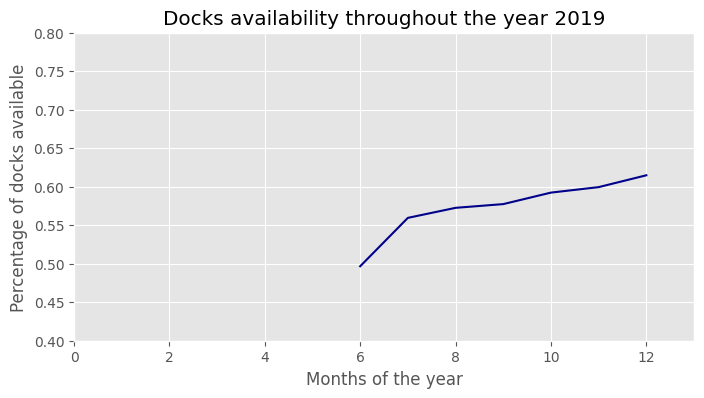

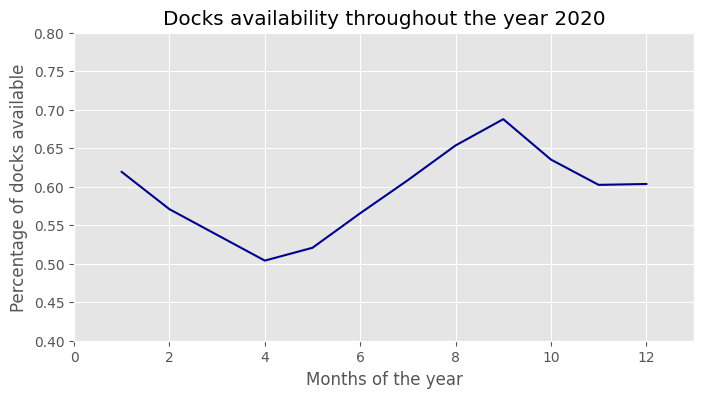

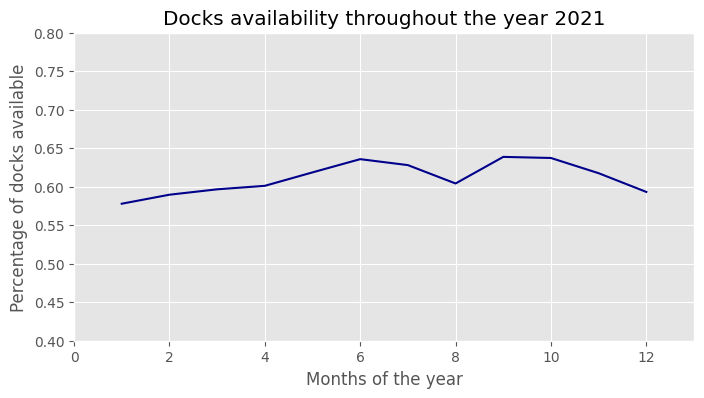

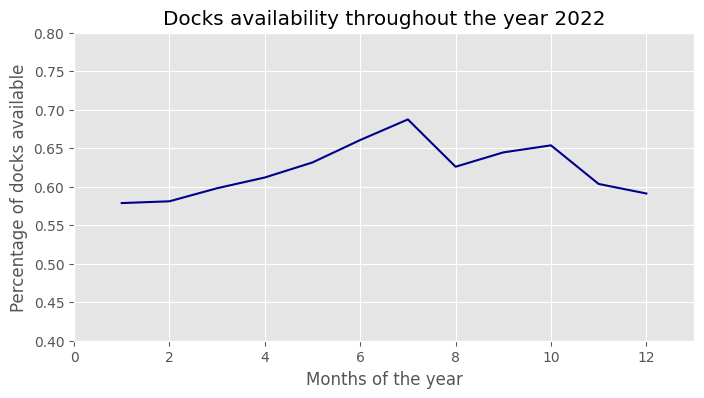

In [51]:
for year in [2019, 2020, 2021, 2022]:
    fig, ax= plt.subplots(figsize=(8, 4))
    (bicing_status
     .query(f'year == {year}')
     .groupby(by=['month'])['percentage_docks_available'].mean()
     .plot(ax=ax, xlim=(0, 13), ylim=(0.4, 0.8), c='darkblue')
    )
    plt.xlabel('Months of the year')
    plt.ylabel('Percentage of docks available')
    plt.title(f'Docks availability throughout the year {year}')